In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 先找到轮廓
img = cv2.imread('unregular.jpg', 0)
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh, 3, 2)

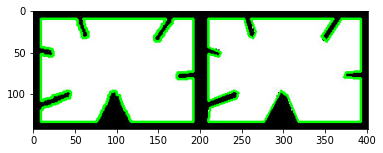

In [3]:
# 多边形逼近
# 参数2：是一个距离值，表示多边形的轮廓接近实际轮廓的程度，值越小，越精确
# 参数3：表示是否闭合
cnt = contours[0]
approx = cv2.approxPolyDP(cnt, 3, True)
img1 = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img2 = np.copy(img1)
cv2.polylines(img1, [approx], True, (0, 255, 0), 2)
cv2.drawContours(img2, contours, -1, (0, 255, 0), 2)
plt.imshow(np.hstack((img2, img1))[:,:,::-1])
plt.show()

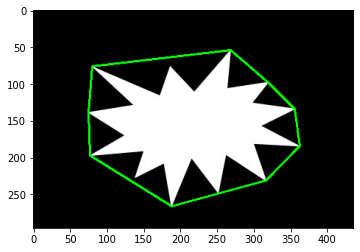

In [4]:
# 凸包
img = cv2.imread('convex.jpg', 0)
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh, 3, 2)
cnt = contours[0]
# 寻找凸包，得到凸包的角点
hull = cv2.convexHull(cnt)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.polylines(img, [hull], True, (0, 255, 0), 2)
plt.imshow(img[:,:,::-1])
plt.show()

In [5]:
# 有个可选参数returnPoints，默认是True，代表返回角点的x/y坐标；如果为False的话，表示返回轮廓中是凸包角点的索引
hull2 = cv2.convexHull(cnt, returnPoints=False)
print(cnt[hull2])

[[[[319  98]]]


 [[[355 134]]]


 [[[362 184]]]


 [[[316 231]]]


 [[[188 266]]]


 [[[ 77 197]]]


 [[[ 75 139]]]


 [[[ 80  76]]]


 [[[268  54]]]]


In [6]:
# 判断轮廓是否是凸形
print(cv2.isContourConvex(hull)) 

True


In [7]:
dist = cv2.pointPolygonTest(cnt, (100, 100), True)
# 参数3为True时表示计算距离值：点在轮廓外面值为负，点在轮廓上值为0，点在轮廓里面值为正
# 参数3为False时，只返回-1/0/1表示点相对轮廓的位置，不计算距离。
print(dist)

-3.5355339059327378
